<a href="https://colab.research.google.com/github/SandunMunasinghe20/SandunMunasinghe20/blob/main/CO544_Machine_Learning_and_Data_Mining_Take_Home_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Dataset Description

The **Statlog** (German Credit Data) dataset contains **1,000 instances** with **20 features** (numerical and categorical) to classify individuals as good or bad credit risks.

 It includes financial and demographic attributes such as account status, credit history, purpose, and employment.

 The dataset has **no missing values** and is widely used for binary classification and model evaluation in credit risk analysis.

## Key Characteristics:
  
Instances: 1,000

Features: 20 (numerical and categorical)

Task: Binary Classification

Missing Values: None

Source: UCI ML Repository

# Data Preprocessing

In [23]:
#install the UCI ML
!pip install ucimlrepo

In [191]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
    'OtherDebtors', 'ResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans',
    'Housing', 'ExistingCredits', 'Job', 'NumLiable', 'Telephone', 'ForeignWorker', 'Target'
]

data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

print(data)


/tmp/ipython-input-197042011.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


    Status  Duration CreditHistory Purpose  CreditAmount Savings  \
0      A11         6           A34     A43          1169     A65   
1      A12        48           A32     A43          5951     A61   
2      A14        12           A34     A46          2096     A61   
3      A11        42           A32     A42          7882     A61   
4      A11        24           A33     A40          4870     A61   
..     ...       ...           ...     ...           ...     ...   
995    A14        12           A32     A42          1736     A61   
996    A11        30           A32     A41          3857     A61   
997    A14        12           A32     A43           804     A61   
998    A11        45           A32     A43          1845     A61   
999    A12        45           A34     A41          4576     A62   

    EmploymentSince  InstallmentRate PersonalStatusSex OtherDebtors  ...  \
0               A75                4               A93         A101  ...   
1               A73            

In [192]:
X = data.drop(columns=['Target'])
y= data['Target']

In [193]:
# view targets
print(y)

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: Target, Length: 1000, dtype: int64


In [194]:
# categorical and numerical data

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Status', 'CreditHistory', 'Purpose', 'Savings', 'EmploymentSince', 'PersonalStatusSex', 'OtherDebtors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker']
Numerical features: ['Duration', 'CreditAmount', 'InstallmentRate', 'ResidenceSince', 'Age', 'ExistingCredits', 'NumLiable']


In [195]:

print("Number of rows in X:", X.shape[0])
print("Number of columns in X:", X.shape[1])

# For the whole dataset
print("Data shape:", data.shape)


Number of rows in X: 1000
Number of columns in X: 20
Data shape: (1000, 21)


In [207]:
# Count of each class
print(y.value_counts())


Target
1    700
2    300
Name: count, dtype: int64


So here we can see out of 1000 instances we have 300 fraudukent credit tasks.

Domain & Objective

Domain: Banking / Finance (Credit Scoring)

Objective: Predict whether a credit applicant is a good or bad credit risk based on personal, financial, and employment data.

### Confirm no missing values

In [202]:
print(X.isnull().sum())

Status                   0
Duration                 0
CreditHistory            0
Purpose                  0
CreditAmount             0
Savings                  0
EmploymentSince          0
InstallmentRate          0
PersonalStatusSex        0
OtherDebtors             0
ResidenceSince           0
Property                 0
Age                      0
OtherInstallmentPlans    0
Housing                  0
ExistingCredits          0
Job                      0
NumLiable                0
Telephone                0
ForeignWorker            0
dtype: int64


### Remove Duplicates

In [204]:
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (1000, 21)


### Encoding categorical features

In [205]:
from sklearn.preprocessing import LabelEncoder

# copy x
X_encoded = X.copy()

le = LabelEncoder()
for col in categorical_features:
    X_encoded[col] = le.fit_transform(X_encoded[col])

print("Categorical features encoded successfully!")

print(X_encoded)

Categorical features encoded successfully!
     Status  Duration  CreditHistory  Purpose  CreditAmount  Savings  \
0         0         6              4        4          1169        4   
1         1        48              2        4          5951        0   
2         3        12              4        7          2096        0   
3         0        42              2        3          7882        0   
4         0        24              3        0          4870        0   
..      ...       ...            ...      ...           ...      ...   
995       3        12              2        3          1736        0   
996       0        30              2        1          3857        0   
997       3        12              2        4           804        0   
998       0        45              2        4          1845        0   
999       1        45              4        1          4576        1   

     EmploymentSince  InstallmentRate  PersonalStatusSex  OtherDebtors  \
0                 

### Scale numerical features

In [206]:
from sklearn.preprocessing import MinMaxScaler  #to scale between  0 and 1 (to use in chi squared)

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_encoded)

print("Numerical features scaled successfully!")
print(X_scaled)

Numerical features scaled successfully!
[[0.         0.02941176 1.         ... 0.         1.         0.        ]
 [0.33333333 0.64705882 0.5        ... 0.         0.         0.        ]
 [1.         0.11764706 1.         ... 1.         0.         0.        ]
 ...
 [1.         0.11764706 0.5        ... 0.         0.         0.        ]
 [0.         0.60294118 0.5        ... 0.         1.         0.        ]
 [0.33333333 0.60294118 1.         ... 0.         0.         0.        ]]


Map target variable to binary

In [209]:
# 1 → Good credit, 2 → Bad credit
y_mapped = y.map({1: 0, 2: 1})  # 0 = good, 1 = bad

print("Target variable mapped successfully!")
print(y_mapped.value_counts())
print(y_mapped.head())

Target variable mapped successfully!
Target
0    700
1    300
Name: count, dtype: int64
0    0
1    1
2    0
3    0
4    1
Name: Target, dtype: int64


# Exploratory Data Analysis (EDA)

In [210]:
# Summary statistics for numerical features

X_scaled_df = pd.DataFrame(X_scaled, columns = X_encoded.columns) #X_scaled is a numpy arr
print("Summary statistics:")
print(X_scaled_df.describe())


Summary statistics:
            Status     Duration  CreditHistory      Purpose  CreditAmount  \
count  1000.000000  1000.000000     1000.00000  1000.000000   1000.000000   
mean      0.525667     0.248574        0.63625     0.364111      0.166241   
std       0.419213     0.177336        0.27078     0.304367      0.155317   
min       0.000000     0.000000        0.00000     0.000000      0.000000   
25%       0.000000     0.117647        0.50000     0.111111      0.061379   
50%       0.333333     0.205882        0.50000     0.333333      0.113871   
75%       1.000000     0.294118        1.00000     0.444444      0.204812   
max       1.000000     1.000000        1.00000     1.000000      1.000000   

           Savings  EmploymentSince  InstallmentRate  PersonalStatusSex  \
count  1000.000000      1000.000000      1000.000000        1000.000000   
mean      0.276250         0.596000         0.657667           0.560667   
std       0.395006         0.302077         0.372905         

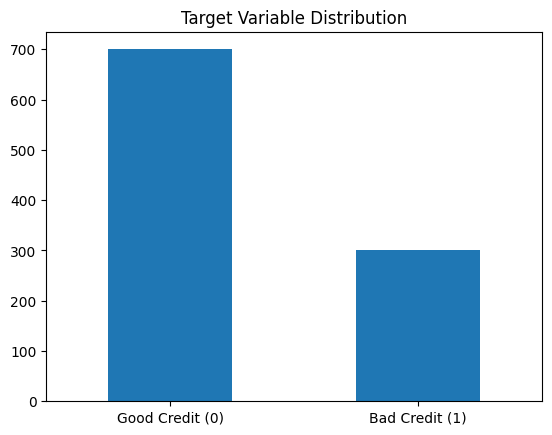

In [211]:
import matplotlib.pyplot as plt

y_series = pd.Series(y.values)
y_series.value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1], ['Good Credit (0)', 'Bad Credit (1)'], rotation=0)
plt.title("Target Variable Distribution")
plt.show()

### View distributions

Histograms of numerical features

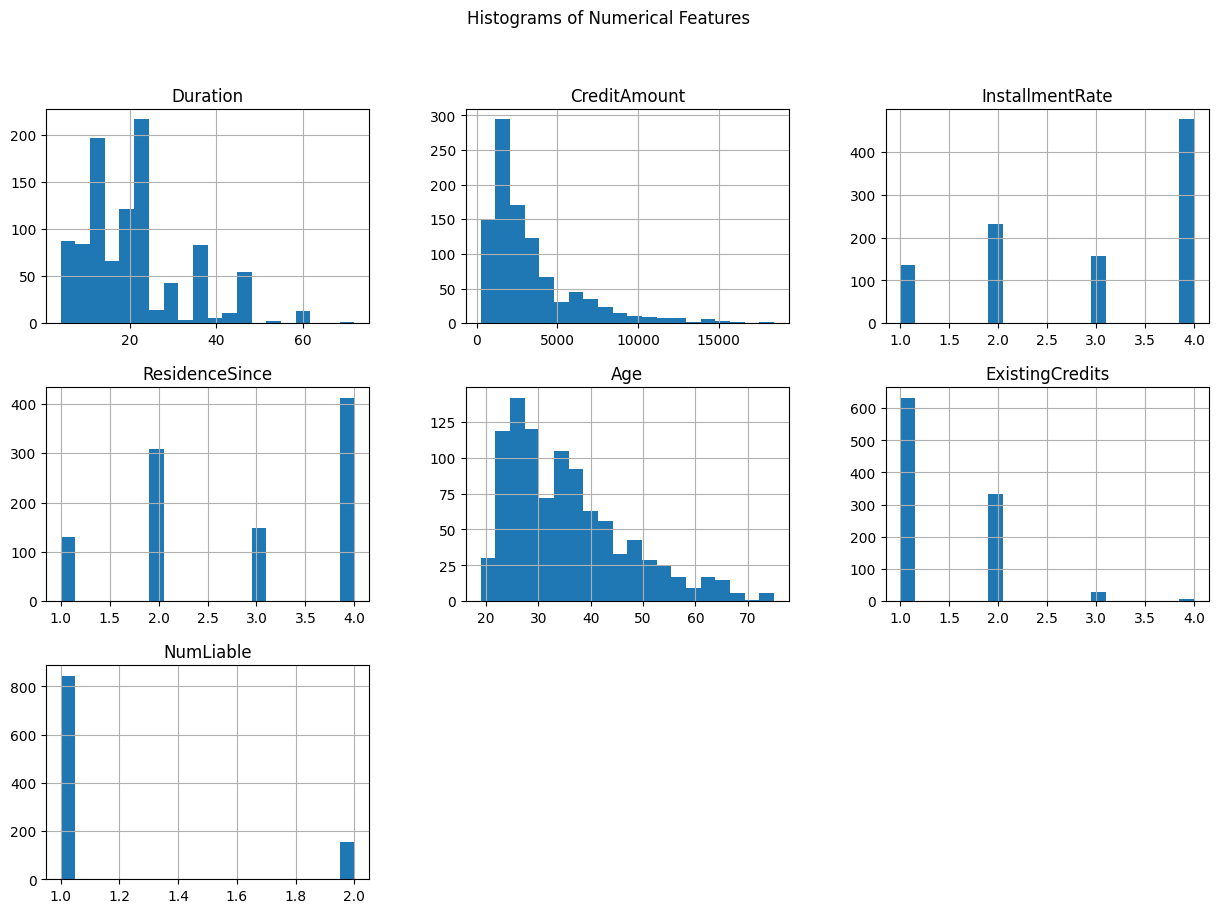

In [212]:
X[numerical_features].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


Count plots of categorical features

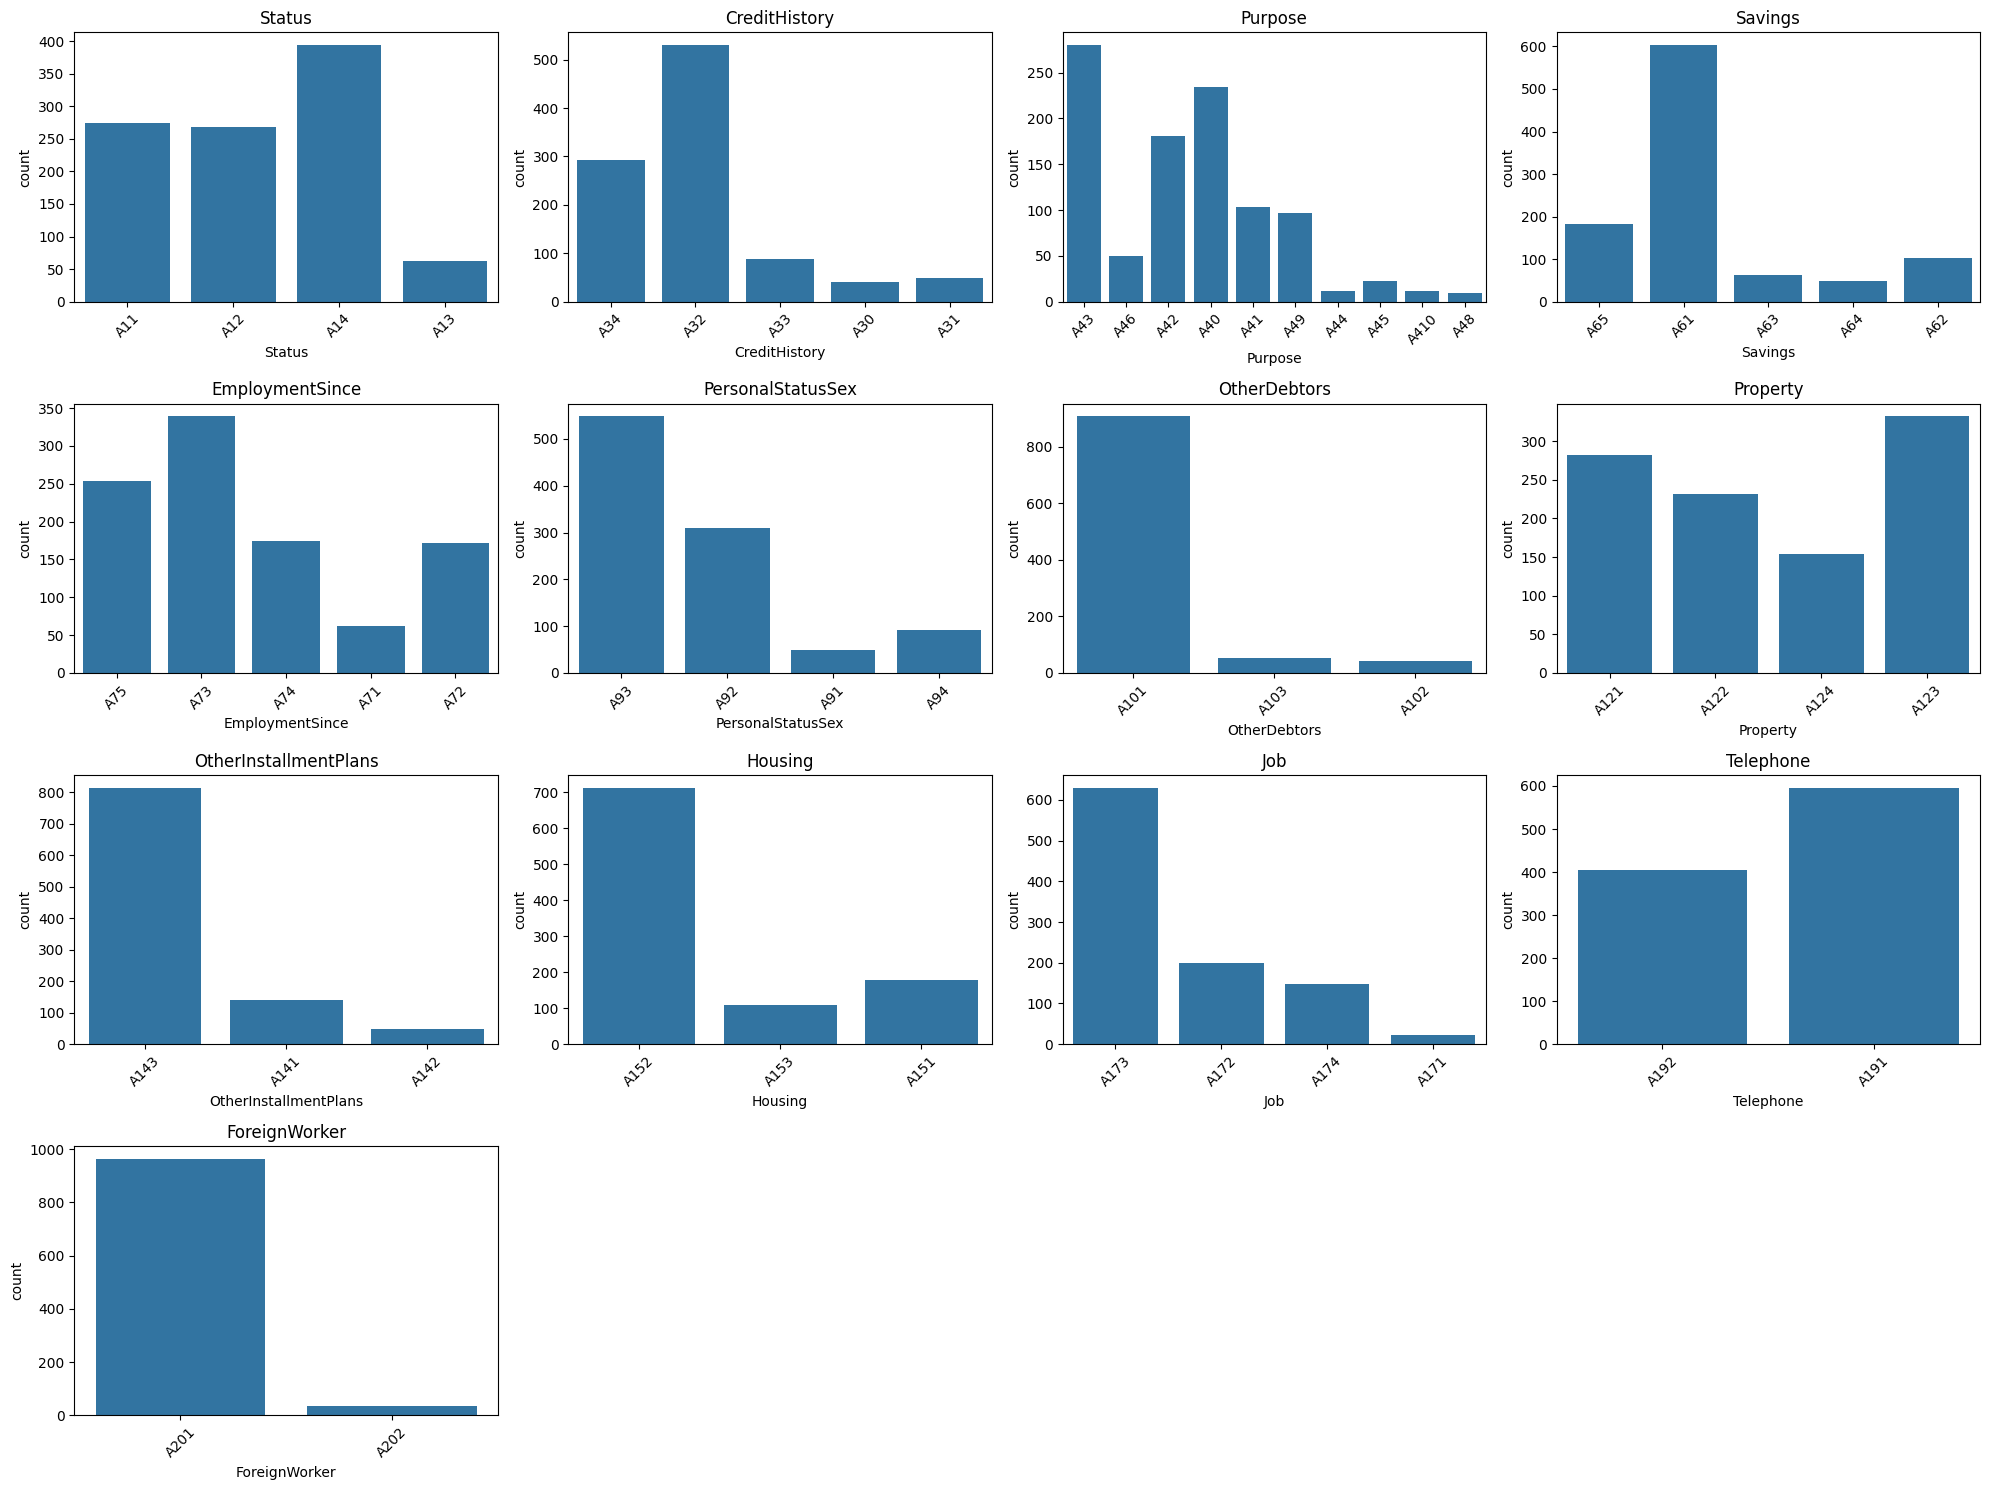

In [213]:
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=X[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Boxplots for outliers in numeric columns

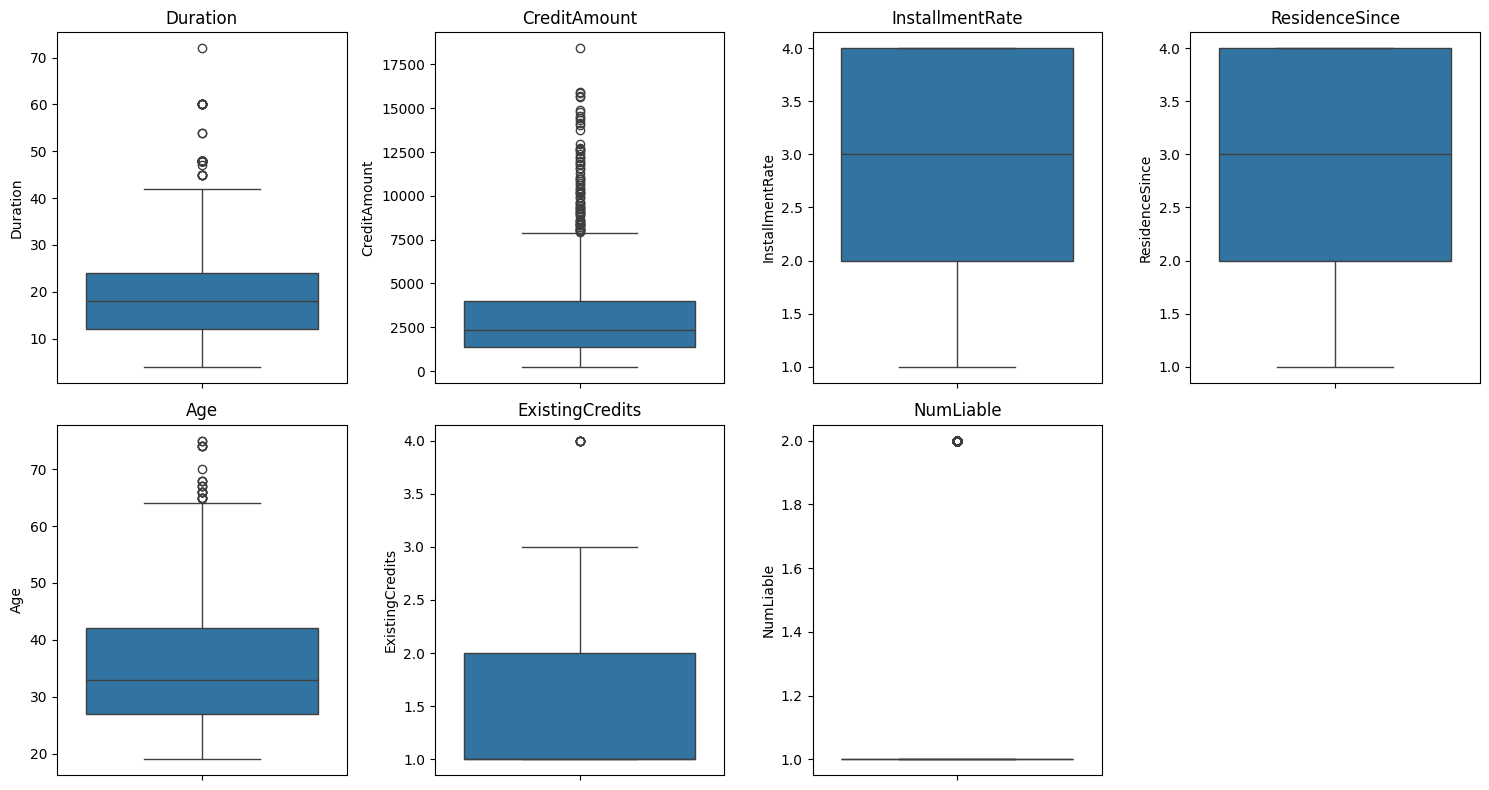

In [214]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### categorical value counts

In [216]:
X['CreditHistory'].value_counts()

,count
CreditHistory,
A32,530
A34,293
A33,88
A31,49
A30,40


### Correlation analysis

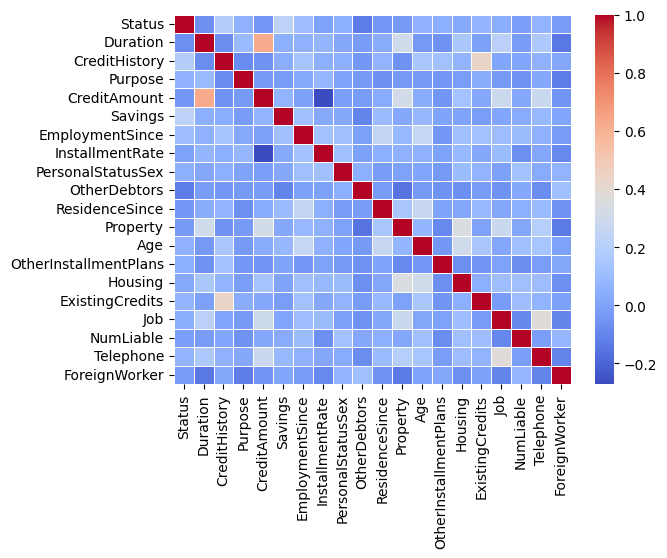

In [217]:
import seaborn as sns
corr = X_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.show()


In [248]:
#view correlation in descending order
import pandas as pd

corr_matrix = X_encoded.copy()
corr_matrix['Target'] = y_mapped

target_corr = corr_matrix.corr()['Target'].sort_values(ascending = False)
print(target_corr)

Target                   1.000000
Duration                 0.214927
CreditAmount             0.154739
Property                 0.142612
InstallmentRate          0.072404
Job                      0.032735
ResidenceSince           0.002967
Purpose                  0.001514
NumLiable               -0.003015
Housing                 -0.019315
OtherDebtors            -0.025137
Telephone               -0.036466
ExistingCredits         -0.045732
ForeignWorker           -0.082079
PersonalStatusSex       -0.088184
Age                     -0.091127
OtherInstallmentPlans   -0.109844
EmploymentSince         -0.116002
Savings                 -0.178943
CreditHistory           -0.228785
Status                  -0.350847
Name: Target, dtype: float64


Feature Selection

In [219]:
from sklearn.feature_selection import SelectKBest, chi2

#chi squared used to neglect neg values
selector = SelectKBest(score_func=chi2, k=15)
X_new = selector.fit_transform(X_encoded, y_mapped)
selected_features = X_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Status', 'Duration', 'CreditHistory', 'CreditAmount', 'Savings',
       'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
       'OtherDebtors', 'Property', 'Age', 'OtherInstallmentPlans',
       'ExistingCredits', 'Telephone', 'ForeignWorker'],
      dtype='object')


### Modeling

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_mapped, test_size=0.2, random_state=42, stratify=y_mapped
)


Models

In [238]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

#  Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

#  Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svm))

#  Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

#  Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

#  Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Neural Network (MLP):\n", classification_report(y_test, y_pred_mlp))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       140
           1       0.62      0.50      0.56        60

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200

Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       140
           1       0.68      0.43      0.53        60

    accuracy                           0.77       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       140
           1       0.64      0.47      0.54        60

    accuracy                           0.76       200
   macro avg       0.72      0.68      0.69       200
weighted av

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


All above metrics came with a unbalanced dataset. When we consider the whole datset,
      Good >> 700
      Bad  >> 300

So the above results might be biased towards the majority class(Good).

Balancing Training data

installing SMOTE to do balancing

In [241]:
!pip install imbalanced-learn

In [246]:
from imblearn.over_sampling import SMOTE;

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Original training class distribution:\n", y_train.value_counts())
print("Balanced training class distribution:\n", y_train_bal.value_counts())


Original training class distribution:
 Target
0    560
1    240
Name: count, dtype: int64
Balanced training class distribution:
 Target
1    560
0    560
Name: count, dtype: int64


Training models with balanced data

In [247]:

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_bal, y_train_bal)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svm))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_bal, y_train_bal)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

# Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
mlp.fit(X_train_bal, y_train_bal)
y_pred_mlp = mlp.predict(X_test)
print("Neural Network (MLP):\n", classification_report(y_test, y_pred_mlp))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.71      0.78       140
           1       0.52      0.72      0.60        60

    accuracy                           0.71       200
   macro avg       0.69      0.72      0.69       200
weighted avg       0.75      0.71      0.73       200

Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       140
           1       0.67      0.55      0.61        60

    accuracy                           0.79       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       140
           1       0.56      0.68      0.62        60

    accuracy                           0.74       200
   macro avg       0.71      0.73      0.71       200
weighted av

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Here definetely can see the improvement of accuray when balance the training data